<a href="https://colab.research.google.com/github/siddhamapple/EDA/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pwd

/content/drive/MyDrive/EDA


In [ ]:
%cd /content/drive/MyDrive/EDA/

/content/drive/MyDrive/EDA


In [ ]:
ds='titanic_train.csv'

In [ ]:
train=pd.read_csv(ds)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


FINDING MISSING VALUES

In [ ]:
train.isnull() #true means null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

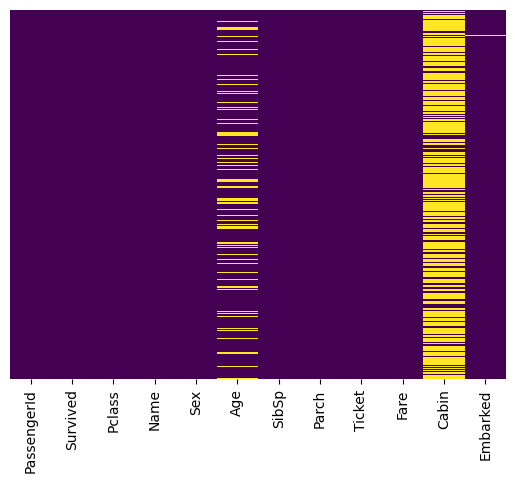

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<ipython-input-123-03ef7fa773cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='Survived',palette='husl')


<Axes: xlabel='Survived', ylabel='count'>

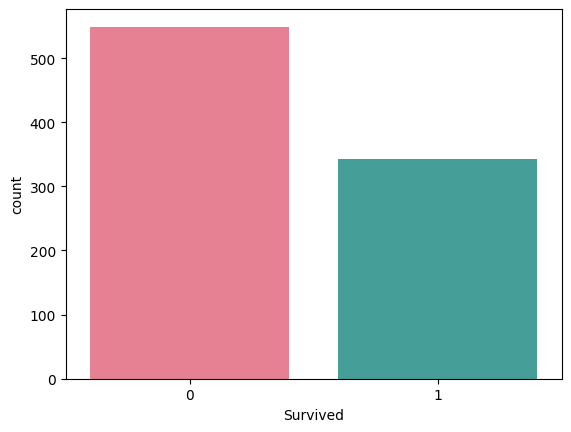

In [ ]:
sns.set_style=('whitegrid')
sns.countplot(data=train,x='Survived',palette='husl')

<Axes: xlabel='Survived', ylabel='count'>

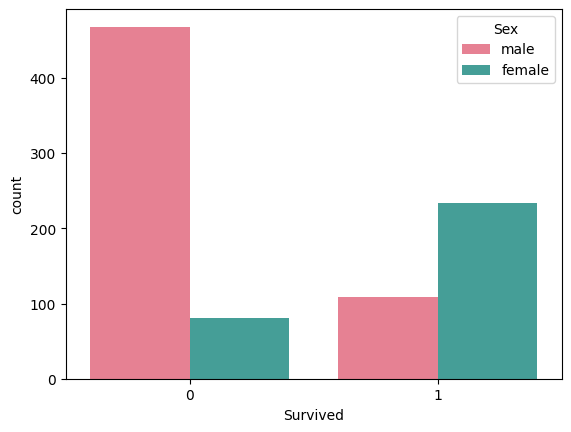

In [ ]:
sns.countplot(data=train,hue='Sex',x='Survived',palette='husl')

<Axes: xlabel='Survived', ylabel='count'>

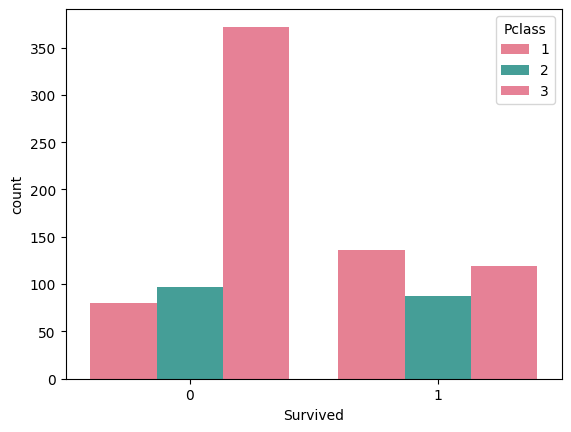

In [ ]:
sns.countplot(x='Survived',hue='Pclass',palette='husl',data=train)

<Axes: xlabel='Sex', ylabel='count'>

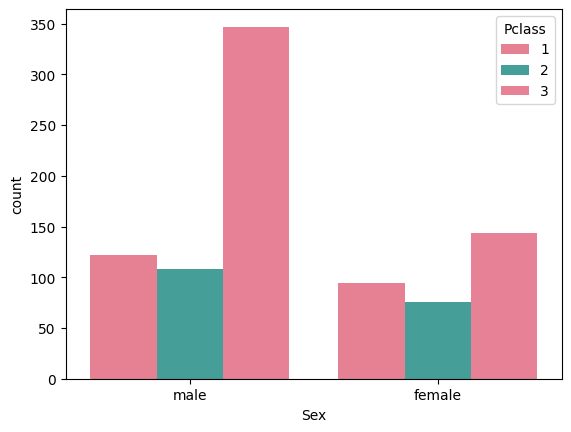

In [ ]:
sns.countplot(data=train,x='Sex',hue='Pclass',palette='husl')

<Axes: xlabel='Age', ylabel='count'>

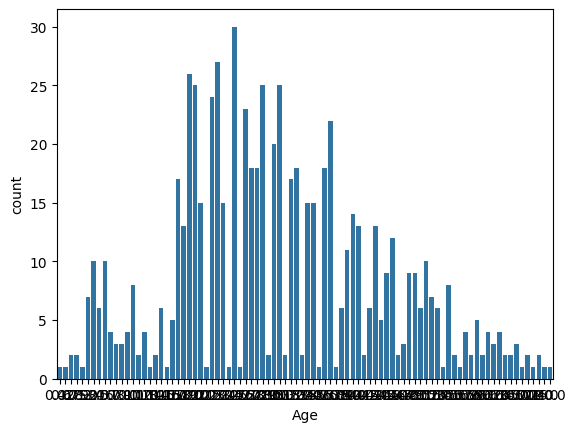

In [ ]:
sns.countplot(data=train,x='Age',orient='h')

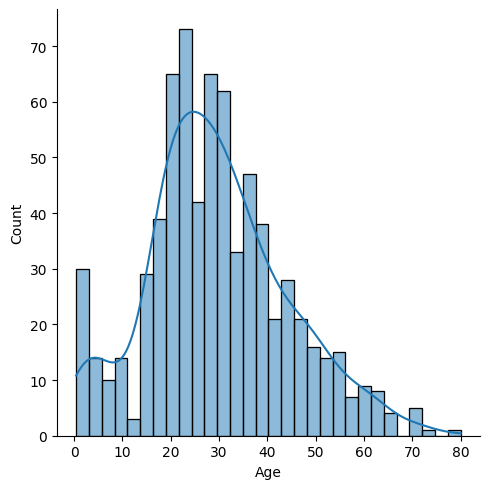

In [ ]:
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

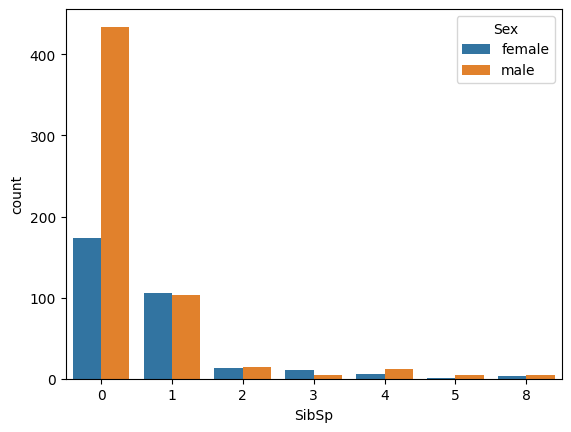

In [ ]:
sns.countplot(data=train,x='SibSp',hue='Sex')

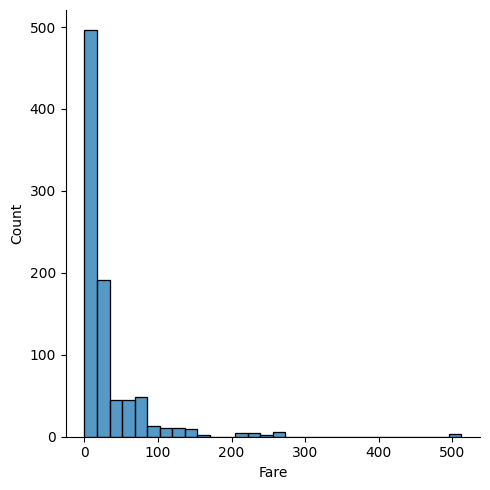

In [ ]:
sns.displot(train['Fare'],bins=30)

Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

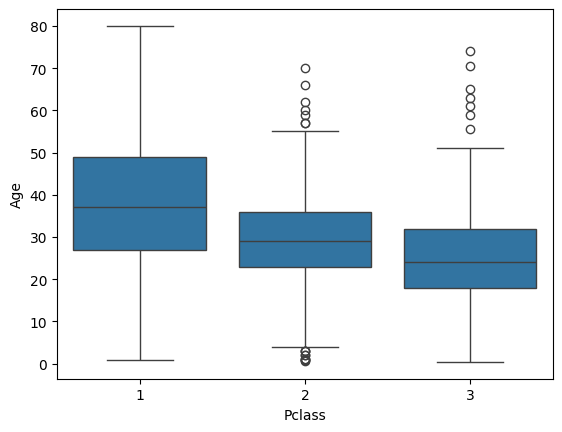

In [ ]:
  sns.boxplot(data=train,x='Pclass',y='Age',)

In [ ]:
def age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37

    elif Pclass==2:
      return 29

    else:
      return 26

  return Age


In [ ]:
train['Age']=train[['Age','Pclass']].apply(age,axis=1)

<ipython-input-132-d734cac53212>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
<ipython-input-132-d734cac53212>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

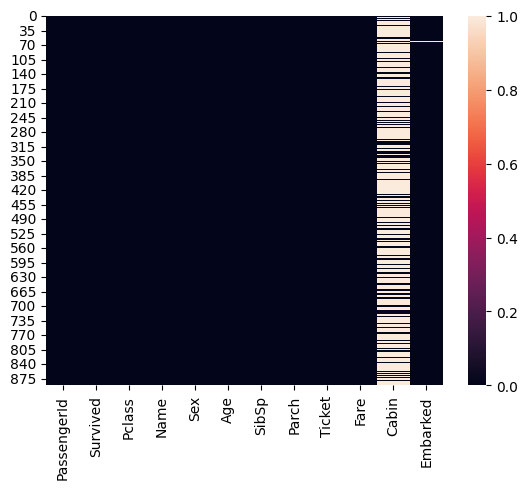

In [ ]:
sns.heatmap(train.isnull())

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

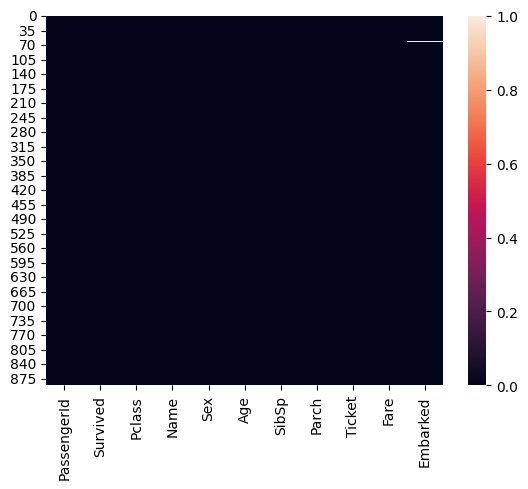

In [ ]:
sns.heatmap(data=train.isnull())

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
tojoin=pd.concat([sex,embark],axis =1)

In [ ]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [ ]:
train=pd.concat([train,tojoin],axis=1)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,26,1,0,True,False,True
1,1,1,37,1,0,False,False,False
2,1,3,26,0,0,False,False,True
3,1,1,37,1,0,False,False,True
4,0,3,26,0,0,True,False,True
